In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [4]:
data_1=pd.read_csv("2021_1_방한여행(국적별).csv")
data_2=pd.read_csv("2021_2_방한여행(국적별).csv")
data_3=pd.read_csv("2021_3_방한여행(국적별).csv")
data_4=pd.read_csv("2021_4_방한여행(국적별).csv")
data_5=pd.read_csv("2021_5_방한여행(국적별).csv")
data_6=pd.read_csv("2021_6_방한여행(국적별).csv")
data_7=pd.read_csv("2021_7_방한여행(국적별).csv")
data_8=pd.read_csv("2021_8_방한여행(국적별).csv")
data_9=pd.read_csv("2021_9_방한여행(국적별).csv")
data_10=pd.read_csv("2021_10_방한여행(국적별).csv")
data_11=pd.read_csv("2021_11_방한여행(국적별).csv")
data_12=pd.read_csv("2021_12_방한여행(국적별).csv")

In [14]:
data_1

,국적,방한관광객
0,미국,12013
1,필리핀,8087
2,중국,7346
3,미얀마,5249
4,인도네시아,3193


In [5]:
data_1['월']="1월"
data_2['월']="2월"
data_3['월']="3월"
data_4['월']="4월"
data_5['월']="5월"
data_6['월']="6월"
data_7['월']="7월"
data_8['월']="8월"
data_9['월']="9월"
data_10['월']="10월"
data_11['월']="11월"
data_12['월']="12월"

In [7]:
data=pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,],axis=0)
data.reset_index(drop=True,inplace=True)
data.head()

,국적,방한관광객,월
0,미국,12013,1월
1,필리핀,8087,1월
2,중국,7346,1월
3,미얀마,5249,1월
4,인도네시아,3193,1월


<AxesSubplot:xlabel='월', ylabel='방한관광객'>

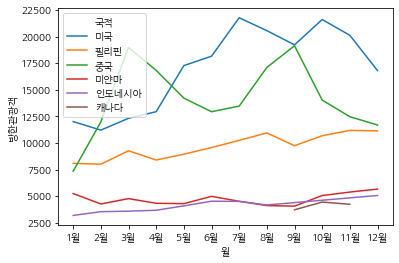

In [11]:
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

sns.lineplot(x="월", y="방한관광객", hue="국적", data=data)

#시각적으로 확인해봤을 때, 2021년기준 미국이 방한관광객수가 높다고 파악됨

In [ ]:
#시각적으로 확인해봤을 때, 미국의 방한관광객수가 더 높은 것으로 보이지만 중국이 미국보다 2월과 3월은 더 방한여행객 수가 높기 때문에 정확한 판단을 위해 두 집단간의 t-test를 진행함

In [13]:
data_usa=data[data["국적"]=="미국"]
data_ch=data[data["국적"]=="중국"]

In [14]:
from scipy.stats import shapiro
shapiro(data_usa["방한관광객"])
#정규성 있음

ShapiroResult(statistic=0.8916367292404175, pvalue=0.12370870262384415)

In [15]:
shapiro(data_ch["방한관광객"])
#정규성 있음

ShapiroResult(statistic=0.945271372795105, pvalue=0.569201648235321)

In [16]:
stats.bartlett(data_usa["방한관광객"],data_ch["방한관광객"])
#등분산성 만족

BartlettResult(statistic=0.23190766245478323, pvalue=0.6301129191443275)

In [17]:
from scipy.stats import ttest_ind
ttest_ind(data_usa["방한관광객"],data_ch["방한관광객"])
#데이터 간의 유의미한 차이가 있음
#따라서 미국을 기준으로 2021년 방한 목적에 대해 분석해봄

Ttest_indResult(statistic=1.8829424523288663, pvalue=0.0729984934591116)